In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-dataset/Breast_cancer_dataset.csv


# 0. Data Understanding

## 0.1 Data Loading

In [2]:
# Load File
path = "/kaggle/input/breast-cancer-dataset/Breast_cancer_dataset.csv"
df = pd.read_csv(path)
df = df.drop('Unnamed: 32',axis=1)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 0.2 Context Overview

Dataset ini berasal dari Breast Cancer Wisconsin (Diagnostic) Data Set, yang secara luas digunakan sebagai tolok ukur dalam pembelajaran mesin untuk diagnosis medis. Dataset ini berisi pengukuran detail inti sel dari sampel jaringan payudara, yang memungkinkan klasifikasi tumor sebagai jinak (non-kanker) atau ganas (kanker). Dataset ini sangat berharga untuk mengembangkan dan menguji model pembelajaran mesin, seperti logistic regression, support vector machines, atau deep neural networks, guna membantu dalam deteksi dini dan akurat kanker payudara. Data diambil berdasarkan beberapa pengukuran terhadap nukleus - nukleus yang ada di gambar hasil FNA (Fine Neddle Aspiration) yang digitalisasi

Tujuan: Klasifikasi biner untuk memprediksi jenis tumor (jinak atau ganas).
Sumber: University of Wisconsin, tersedia melalui Kaggle.
Tautan: Breast Cancer Dataset di Kaggle.
Aplikasi: Cocok untuk penelitian medis, pengembangan model pembelajaran mesin, dan tujuan edukasi.

Struktur Dataset :
* ID : nomor identitas unik untuk tiap sample
* Diagnosis (target): bernilai B (Benign/Jinak) atau M (Malignant/Ganas)
* Radius: rata - rata jarak dari tengah nukleus ke garis luar
* Texture: variasi warna/grayscale dalam sel (semakin banyak nilainya semakin tinggi)
* Perimeter: keliling nukleus
* Area: luas nukleus
* Smoothness: Seberapa halus tepi inti sel. (variasi panjang radius dalam satu sel)
* Compactness: Seberapa padat bentuk inti sel (keliling² / luas - 1.0)
* Concavity: Seberapa dalam bentuk itu melengkung ke dalam 
* Concave points: Berapa banyak titik cekungan di tepi nukleus 
* Symmetry: Seberapa simetris bentuk inti sel
* Fractal dimension: Kompleksitas tepi inti sel. ("coastline approximation" - 1)

Ada 3 Jenis nilai untuk 10 features terakhir :
1. mean: nilai rata - rata
2. se: nilai standard error (standard deviation / √jumlah nukleus pada sample)
3. worst: nilai tertinggi pada pengukuran sample


# 1. Exploratory Data Analysis 

## 1.1 Data Type Checking

In [3]:
print("shape ():", df.shape)
print(df.info())

shape (): (569, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perime

Semua feature merupakan numerik kecuali diagnosis

## 1. 2 Empty Value Check

In [4]:
print(df.isna().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


## 1.3 Distribution Check

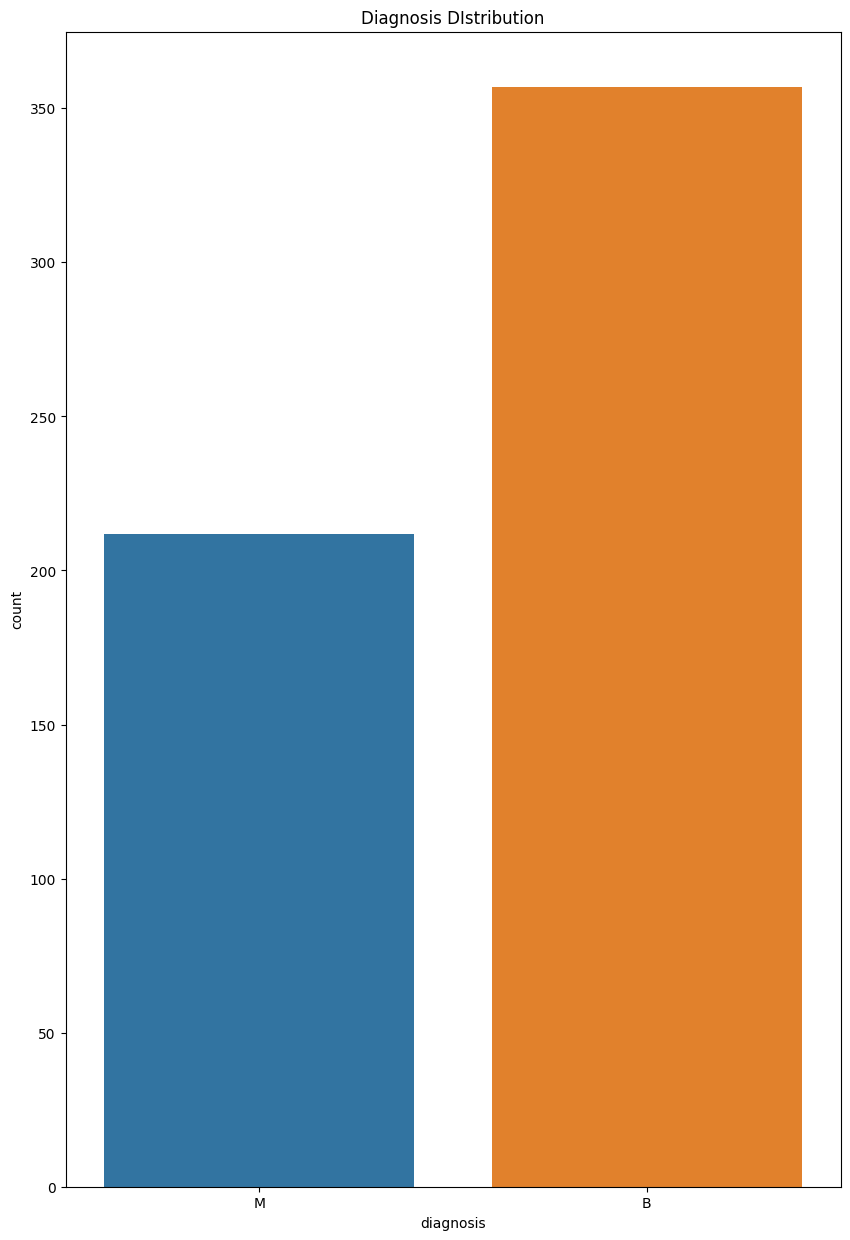

In [5]:
plt.figure(figsize=(10,15))
sns.countplot(x='diagnosis',data=df)
plt.title("Diagnosis DIstribution")
plt.show()

Ada ketidakseimbangan antara sample tumor jinak dan tumor ganas, ini merujuk pada kasus di dunia nyata dimana kebanyakan benjolan atau tumor pada payudara merupakan tumor jinak

referensi : Swoboda, M., Deeg, J., Egle, D., Ladenhauf, V., Galijasevic, M., Plöbst, C., ... & Gruber, L. (2025). Identification of differentiating sonographic features between fibroadenomas and malignant tumors of the breast mimicking fibroadenomas: 10-year experience in 421 histologically verified cases. Ultraschall in der Medizin-European Journal of Ultrasound, 46(03), 291-298.

Perlu dipertimbangkan perlakuan lebih lanjut seperti oversampling atau undersampling 

update :
* undersampling dapat mengurangi false negative tapi perlu pertimbangan lebih lanjut

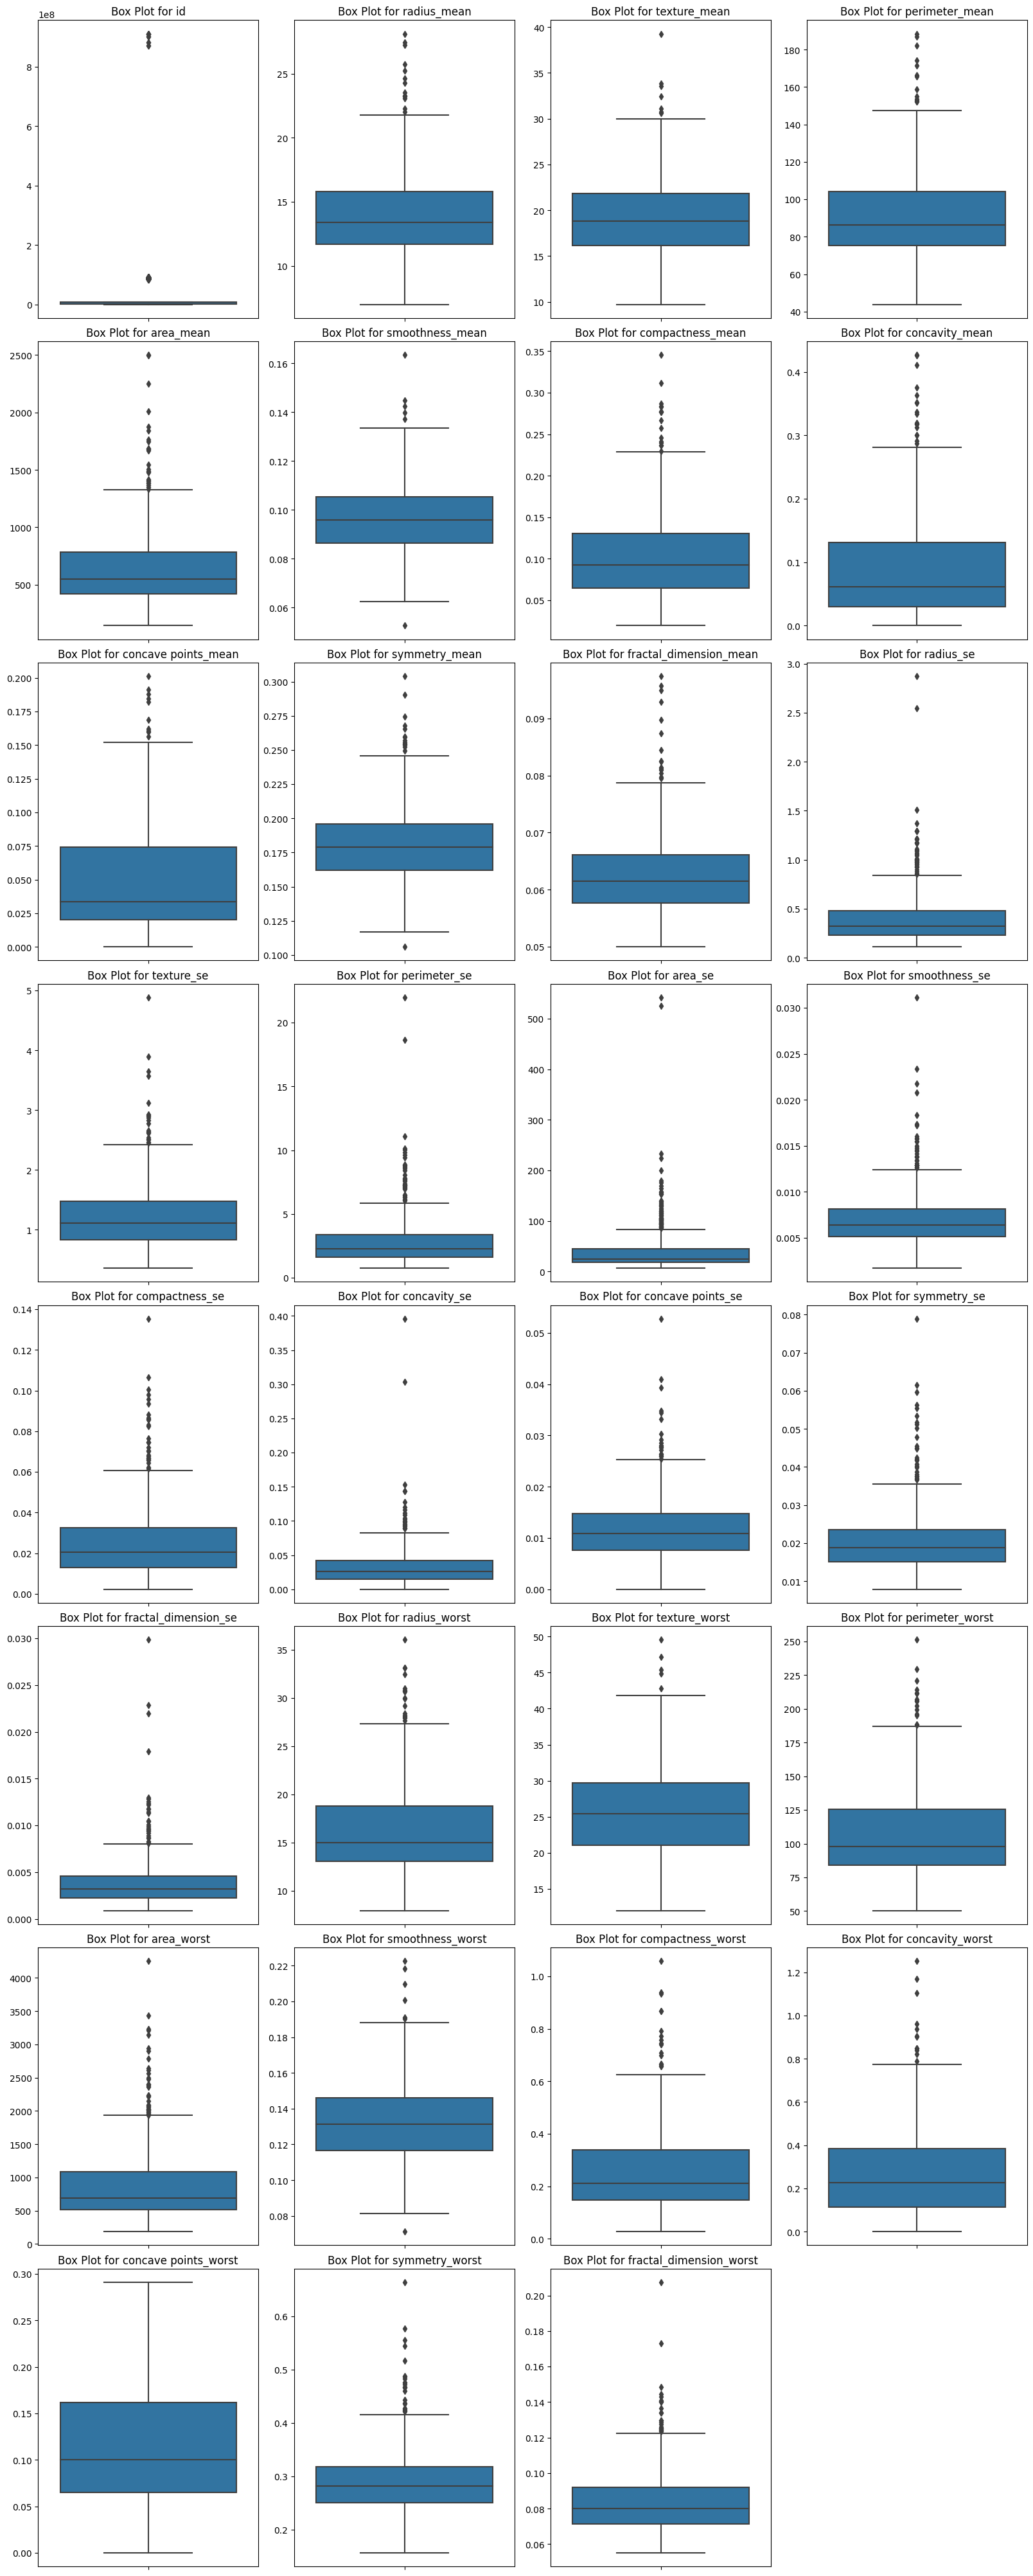

In [6]:

import math

numeric_column = df.select_dtypes(include=['int64','float64']).columns

# compute how many rows needed (ceil division)
ncols = 4
nrows = math.ceil(len(numeric_column) / ncols)

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4*ncols, 5*nrows))

# flatten axes for easy iteration
axs = axs.flatten()

for i, column in enumerate(numeric_column):
    sns.boxplot(y=df[column], ax=axs[i], whis=1.5)
    axs[i].set_title(f'Box Plot for {column}')
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')

# remove empty subplots if any
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.5)
plt.show()

## 1.4 Feature Correlation Check

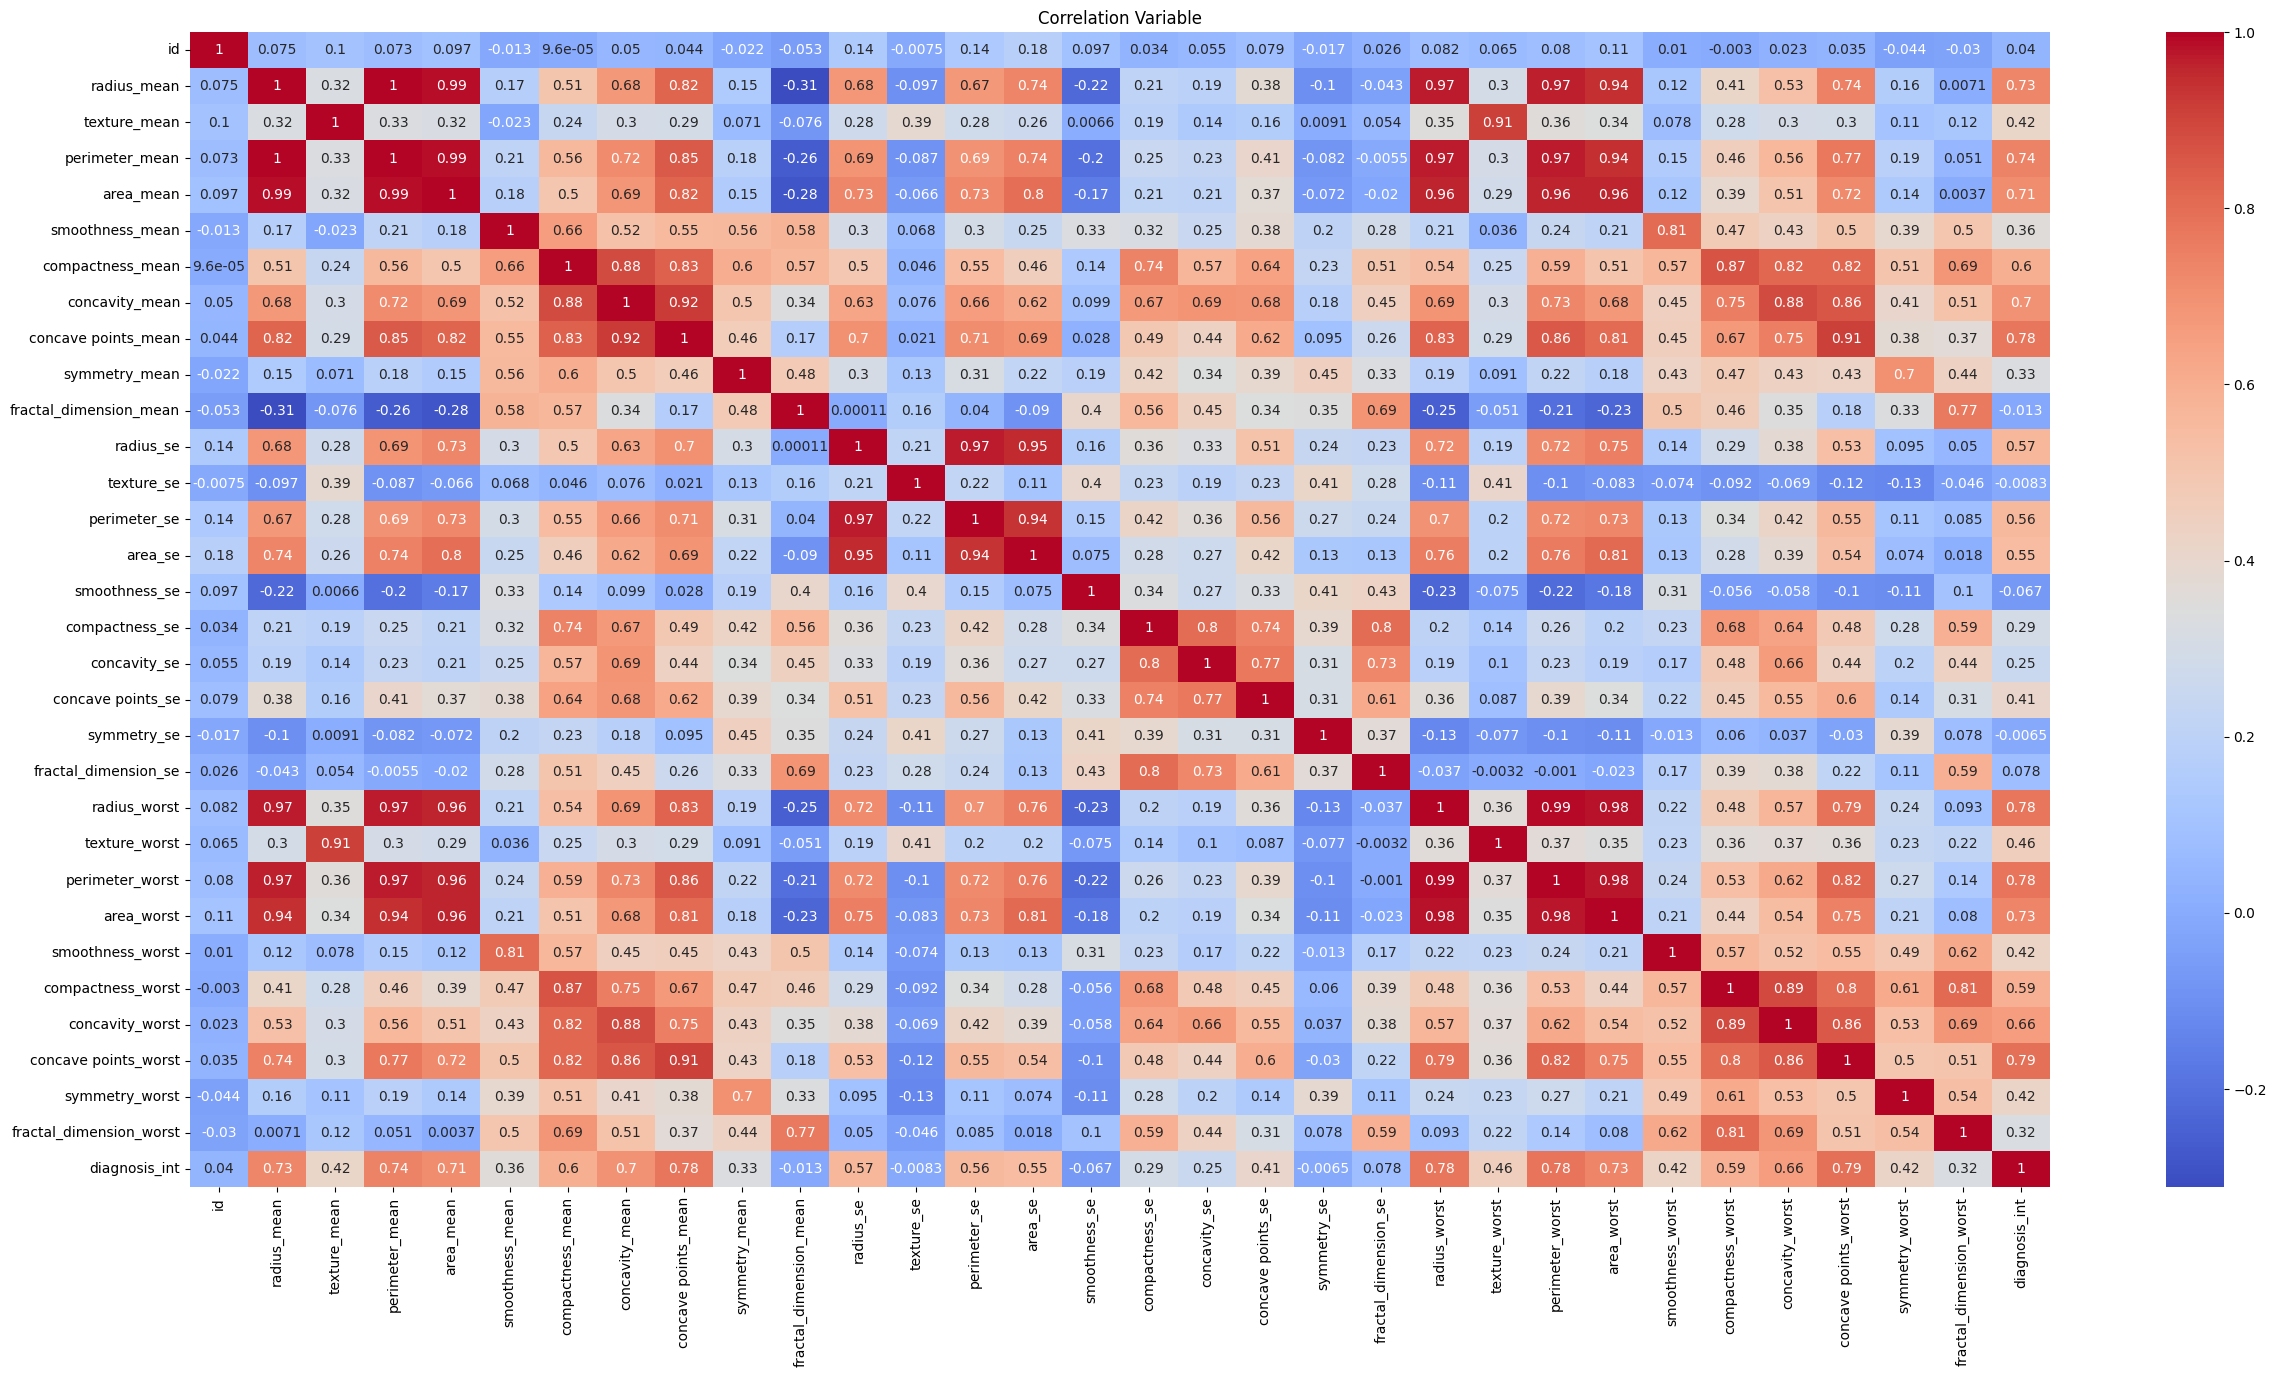

In [7]:
df['diagnosis_int'] = df['diagnosis'].map({'M': 1, 'B': 0})
plt.figure(figsize=(30,15))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Variable')
plt.savefig('Correlation Variable.png')

# 2. Data Preparation

## 2.1 Oulier Cleaning (not used)

In [8]:
    
column = 'radius_worst'

Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count before removal
total_count = len(df)
outlier_count = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()

# Calculate loss percentage
loss_percentage = (outlier_count / total_count) * 100
print(f"Outliers detected in '{column}': {outlier_count}")
print(f"Total rows: {total_count}")
print(f"Loss percentage if removed: {loss_percentage:.2f}%")

Outliers detected in 'radius_worst': 17
Total rows: 569
Loss percentage if removed: 2.99%


In [9]:
# df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()

## 2.2 Undersampling (not used)

In [10]:
benign_count = df['diagnosis'].value_counts().B
malignant_count = df['diagnosis'].value_counts().M
print("Undersampling data loss:", (benign_count - malignant_count)/df['diagnosis'].count() * 100,"%")

Undersampling data loss: 25.48330404217926 %


In [11]:
# majority_class = df[df['diagnosis'] == "B"]
# minority_class = df[df['diagnosis'] == "M"]

# majority_downsampled = majority_class.sample(n=len(minority_class),random_state=42)

# df_balanced = pd.concat([majority_downsampled, minority_class])

# df = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

## 2.3 Feature Selection

In [12]:
selected_features = ['radius_worst', 'concave points_worst']
X = df[selected_features]
Y = df['diagnosis']

## 2.4 Scaling

In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

## 2.5 Data Splitting

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Modeling

In [15]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=50)
rf_model.fit(x_train, y_train)
rf_y_pred = rf_model.predict(x_test)

lr_model = LogisticRegression(random_state=50)
lr_model.fit(x_train, y_train)
lr_y_pred = lr_model.predict(x_test)

svm_model = svm.SVC(kernel='linear')
svm_model.fit(x_train, y_train)
svm_y_pred = svm_model.predict(x_test)


# Model Evaluation

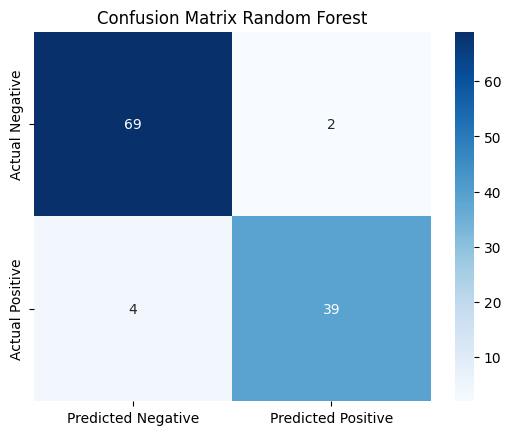

In [16]:
rf_cm = confusion_matrix(y_test, rf_y_pred)
rf_cm_df = pd.DataFrame(rf_cm, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])
sns.heatmap(rf_cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Random Forest')
rf_cm = confusion_matrix(y_test, rf_y_pred)



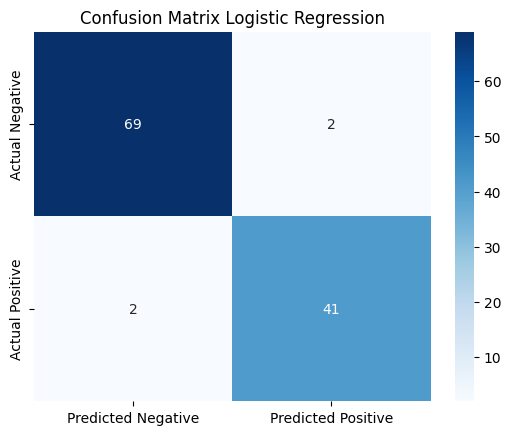

In [17]:
lr_cm = confusion_matrix(y_test, lr_y_pred)
lr_cm_df = pd.DataFrame(lr_cm, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])
sns.heatmap(lr_cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Logistic Regression')
lr_cm = confusion_matrix(y_test, lr_y_pred)

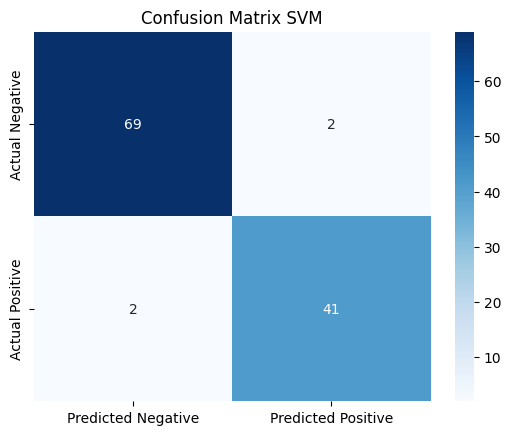

In [18]:
svm_cm = confusion_matrix(y_test, svm_y_pred)
svm_cm_df = pd.DataFrame(svm_cm, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])
sns.heatmap(svm_cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix SVM')
svm_cm = confusion_matrix(y_test, svm_y_pred)

In [19]:
print("classification report Random Forest")
print(classification_report(y_test, rf_y_pred,target_names=['Benign', 'Malignant']))

# Akurasi untuk Random Forest
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Akurasi Random Forest: {rf_accuracy:4f}")

print("")
print("classification report Logistic Regression")
print(classification_report(y_test, lr_y_pred,target_names=['Benign', 'Malignant']))

# Akurasi untuk Random Forest
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print(f"Akurasi Random Forest: {lr_accuracy:4f}")

print("")
print("classification report SVM")
print(classification_report(y_test, svm_y_pred,target_names=['Benign', 'Malignant']))

# Akurasi untuk Random Forest
lr_accuracy = accuracy_score(y_test, svm_y_pred)
print(f"Akurasi Random Forest: {lr_accuracy:4f}")

classification report Random Forest
              precision    recall  f1-score   support

      Benign       0.95      0.97      0.96        71
   Malignant       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Akurasi Random Forest: 0.947368

classification report Logistic Regression
              precision    recall  f1-score   support

      Benign       0.97      0.97      0.97        71
   Malignant       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Akurasi Random Forest: 0.964912

classification report SVM
              precision    recall  f1-score   support

      Benign       0.97      0.97      0.97        71
   Malignant       0.95      0.95      0.95        43

    accuracy